# California Housing dataset

## Fetch data

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

sns.set(rc={'figure.figsize':(10,8)})

In [2]:
housing = pd.read_csv('C:/Users/Kerwin/Machine_Learning_Projects/Housing/datasets/housing/housing.csv')

## General information

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Histograms for numerical values

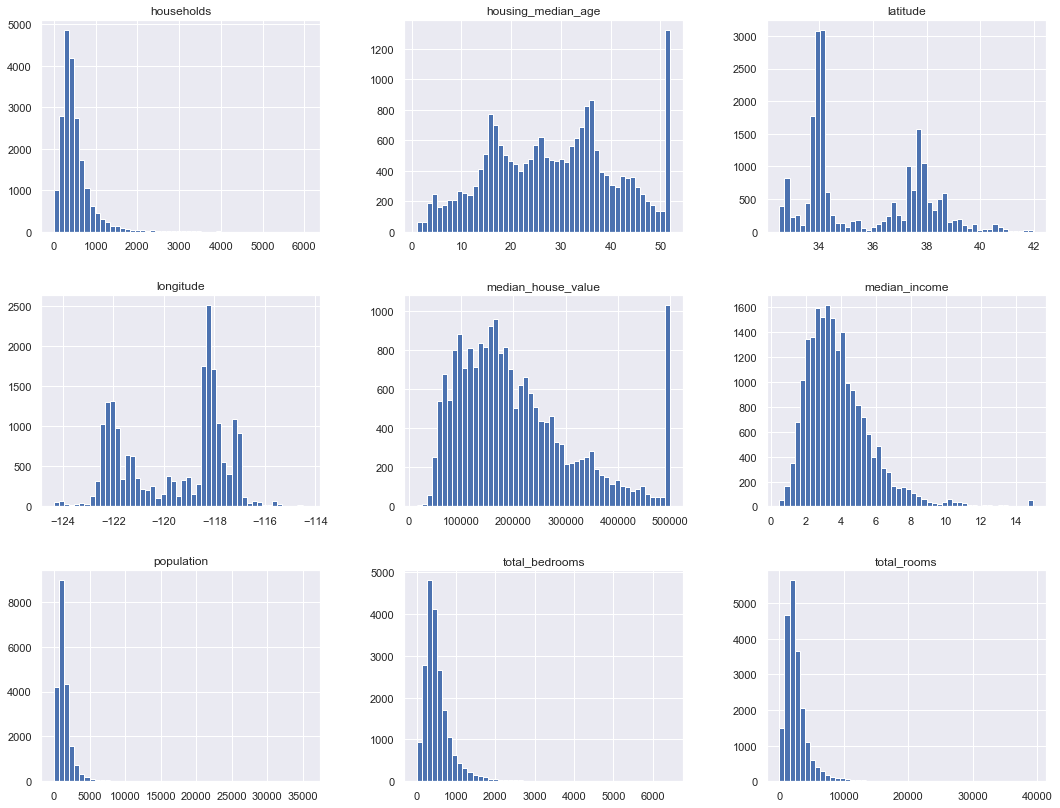

In [7]:
housing.hist(bins=50, figsize=(18,14))
plt.show()

### General correlation

In [8]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


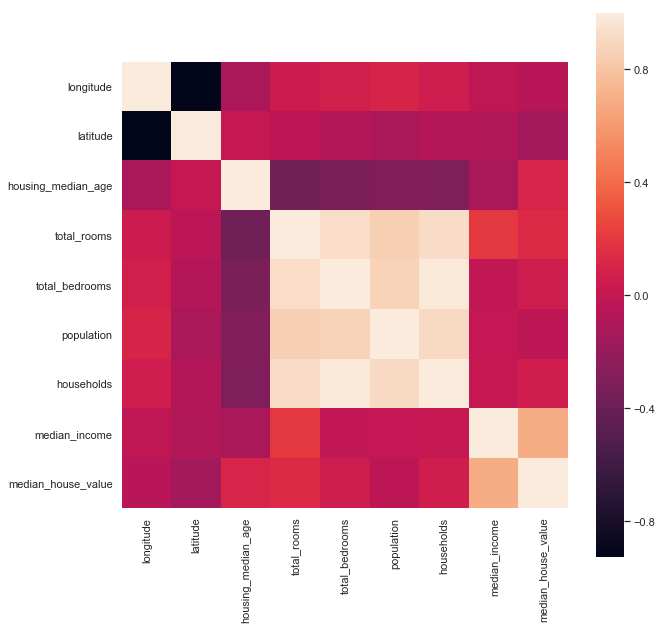

In [9]:
plt.subplots(1,1,figsize=(10,10))
sns.heatmap(
    corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, square=True
)

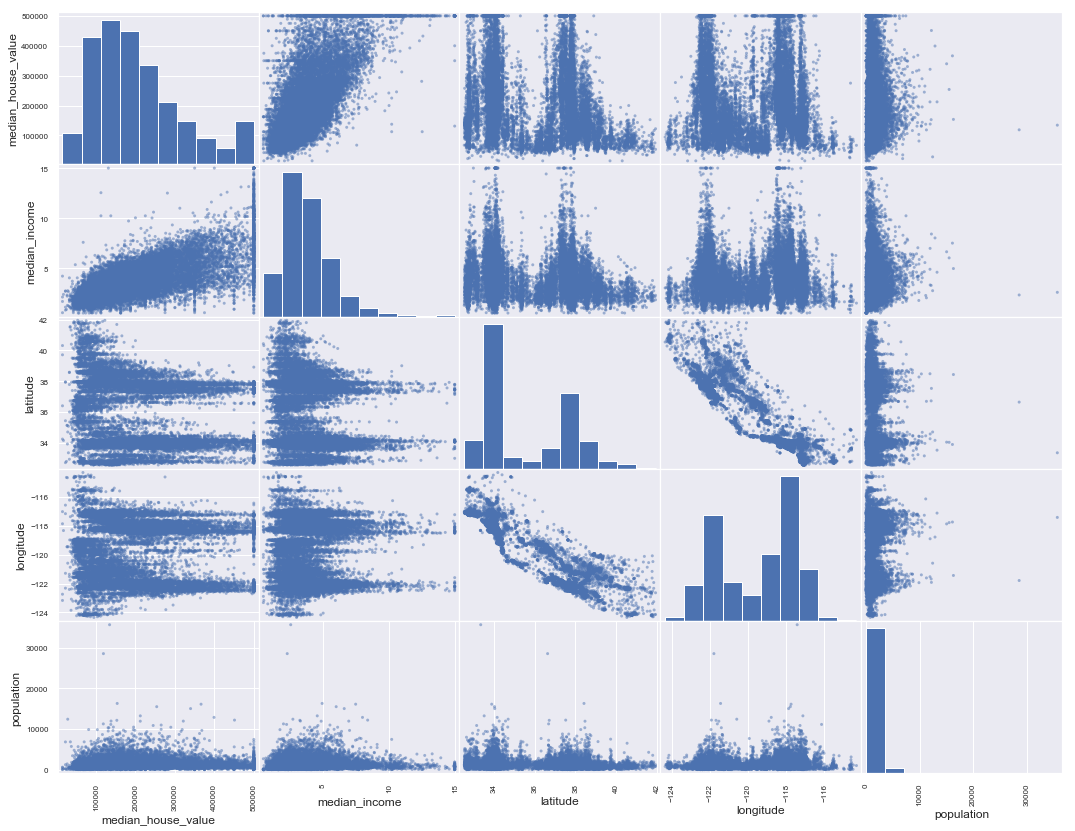

In [10]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'latitude', 'longitude', 'population']
scatter_matrix(housing[attributes], figsize=(18, 14))
plt.show()

Some interesting 'lines' for median_income, longitude and latitude.<br>
Median income seems to have the strongest correlation with median houes value.<br>


**NEED TO DO:**<br>
**1) check the only cat data ocean_proximity since we did not include it here;**<br>
**2) check median income;**<br>
**3) check longitude and latitude;**<br>
**4) create new attributes and further analysis.**

*Added on:*<br>
*5) check population.*

*Optional:*<br>
*6) tree classifier for attributes importance;*<br>
*7) polynomial features for hidden relationship.*

### 1) Ocean_proximity

#### Histograms

C:\Users\Kerwin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


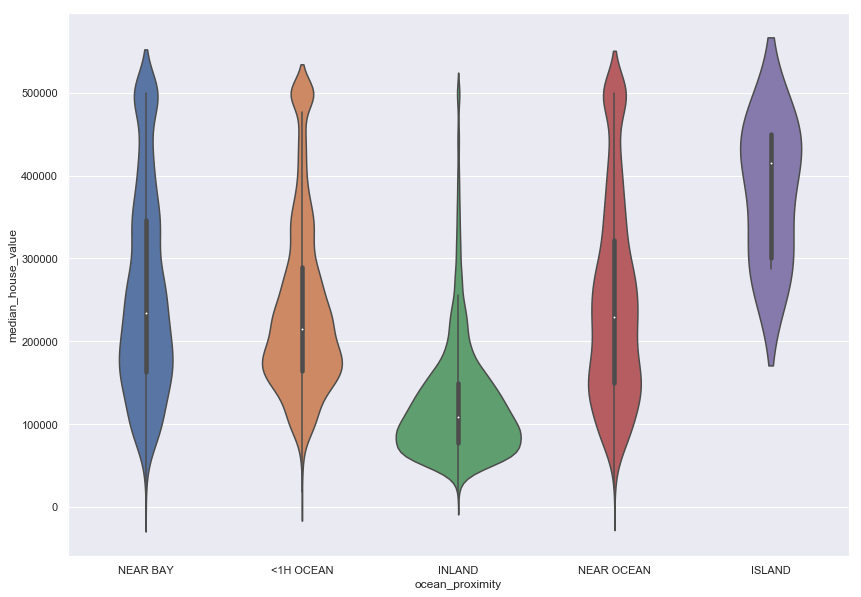

In [11]:
plt.subplots(1,1,figsize=(14,10))
sns.violinplot(data=housing, x='ocean_proximity', y='median_house_value')
plt.show()

In [12]:
OCEAN = housing[housing['ocean_proximity'] == '<1H OCEAN']
INLAND = housing[housing['ocean_proximity'] == 'INLAND']
ISLAND = housing[housing['ocean_proximity'] == 'ISLAND']
NEAR_BAY = housing[housing['ocean_proximity'] == 'NEAR BAY']
NEAR_OCEAN = housing[housing['ocean_proximity'] == 'NEAR OCEAN']

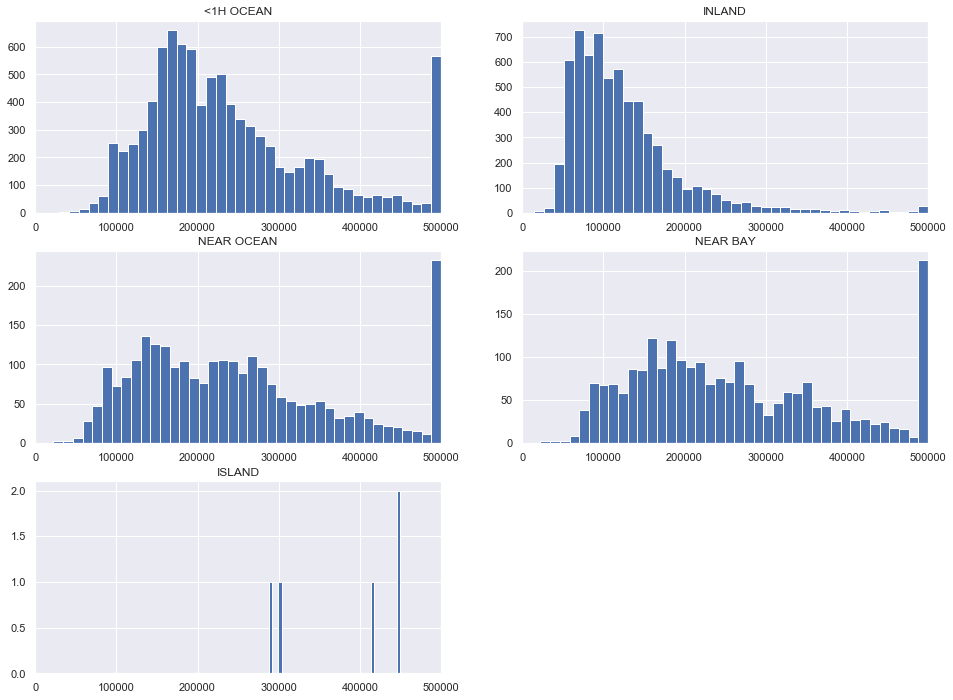

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,12))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
fig.delaxes(ax5)
for dataset, axis, name in zip(
    (OCEAN, INLAND, NEAR_OCEAN, NEAR_BAY, ISLAND),
    (ax0, ax1, ax2, ax3, ax4),
    ('<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND')
):
    axis.hist(dataset['median_house_value'], bins=40)
    axis.set_title(name)
    axis.set_xlim(0, 500000)

1) ISLAND is not helpful due to lack of data;<br>
2) both NEAR OCEAN and NEAR BAY show little relation with median house value;<br>
3) **INLAND** and **<1H OCEAN** are the most promising ones.

#### General idea about how ocean_proximity is categorized

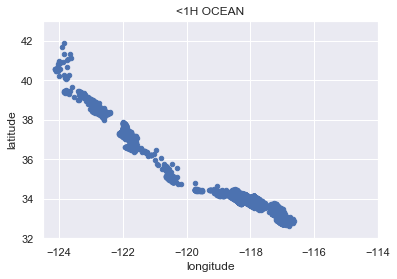

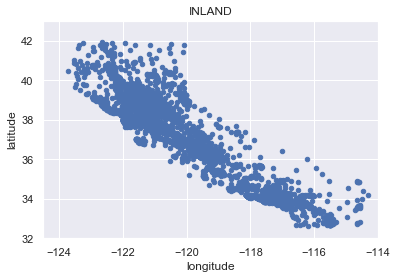

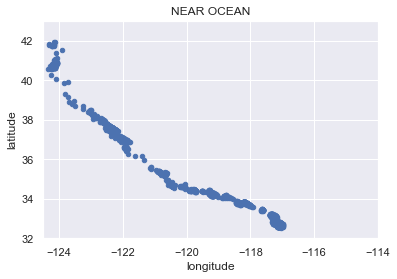

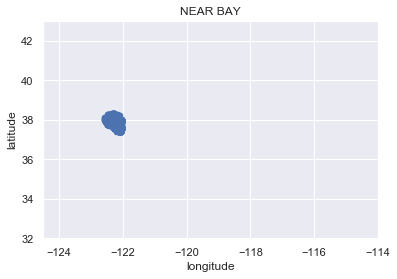

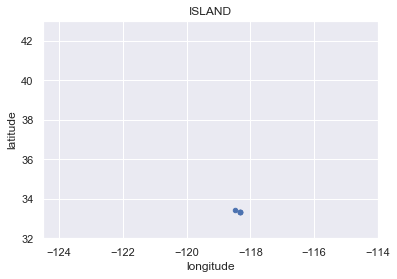

In [14]:
for dataset, name in zip(
    (OCEAN, INLAND, NEAR_OCEAN, NEAR_BAY, ISLAND),
    ('<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND')
):
    dataset.plot(kind='scatter', x='longitude', y='latitude', title=name)
    plt.xlim(-124.5, -114)
    plt.ylim(32, 43)

### 2) Median Income

#### The impact of physical location and population

C:\Users\Kerwin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The equation of line of best fit: y = 41793.849x + 45085.577


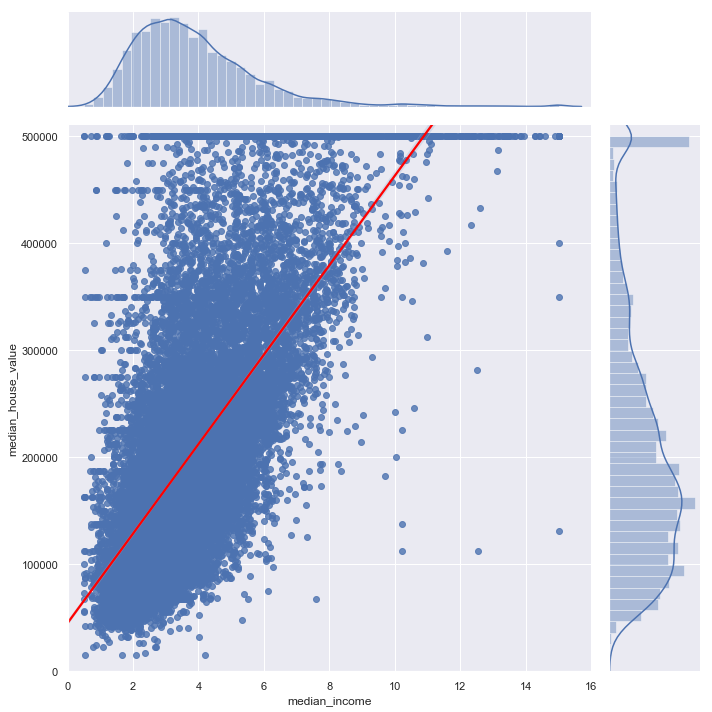

In [15]:
from scipy import stats

g = sns.jointplot(
    data=housing, x='median_income', y='median_house_value', kind='reg', height=10, xlim=(0,16), ylim=(0,510000)
)
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

slope, intercept, r_value, p_value, std_err = stats.linregress(x=regline.get_xdata(),y=regline.get_ydata())
print("The equation of line of best fit: y = {}x + {}".format(str(round(slope, 3)), str(round(intercept, 3))))

Quite strong positive correlation.

### 2)* Interesting lines in median income vs median house value

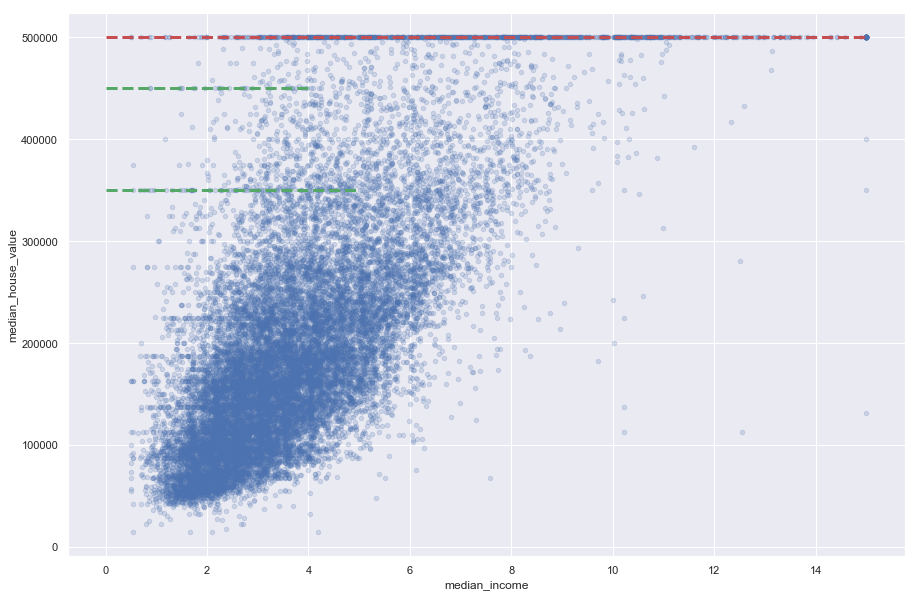

In [16]:
housing.plot(x='median_income', y='median_house_value', kind='scatter', alpha=0.2, figsize=(15, 10))
plt.plot((0, 15), (500000, 500000), 'r--', linewidth=3)
plt.plot((0, 4), (450000, 450000), 'g--', linewidth=3)
plt.plot((0, 5), (350000, 350000), 'g--', linewidth=3)
plt.show()

The top red line might be that during the process of collecting data, the option was "500000 and higher".<br>

### 3) Longitude and Latitude

#### Plot along with population

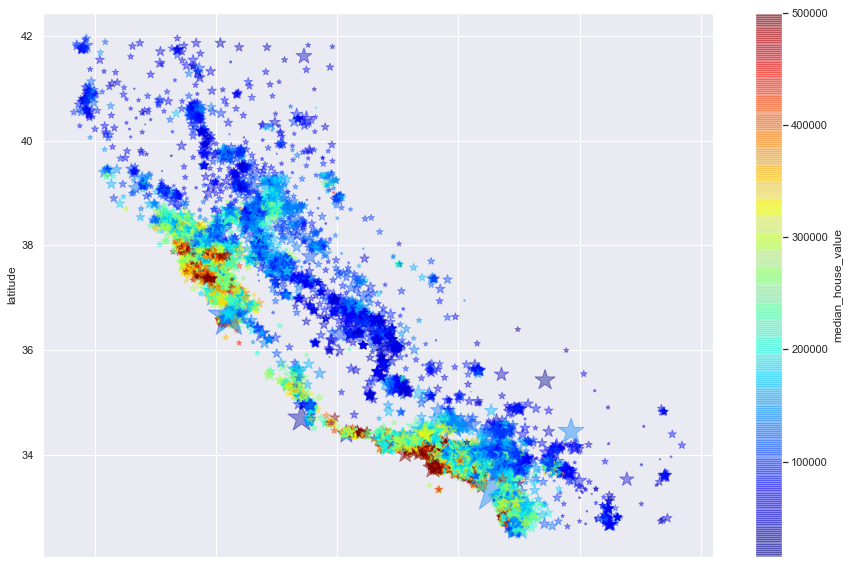

In [17]:
housing.plot(
    kind='scatter', figsize=(15, 10), alpha=0.4,
    x='longitude', y='latitude',
    s=housing['population']/15, marker='*',
    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True
)
plt.show()

First observation is that closer to ocean means higher housing price. Also, it seems the more populated the area, the higher the price of housing value.<br>
**NEED TO DO LATER: 5) check relationship between population and median house value**

#### 3-d plot of graphical information

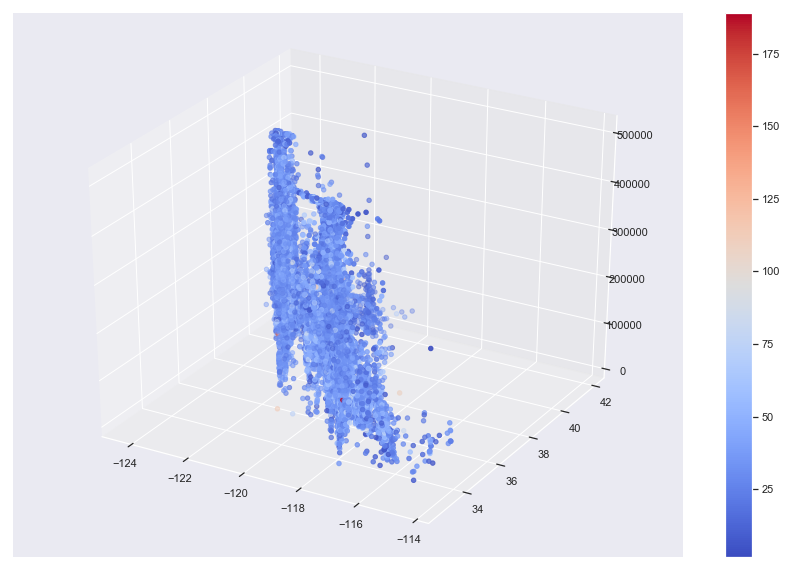

In [18]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(xs=housing['longitude'], ys=housing['latitude'], zs=housing['median_house_value'], 
           c=np.sqrt(housing['population']), cmap=plt.get_cmap('coolwarm'))
fig.colorbar(scatter)
plt.show()

Conclusion: 3-d not helpful here... (need to practice more)

One thing we can try here is to apply change of basis (longitude/latitude) so that the general graph goes from '\\' into '|' or '--'.<br>
May affect the training?? Not sure.

### 4) New attributes

### 4-1 Population per household

In [19]:
pop_per_hhold = housing[['population', 'households', 'median_house_value']].copy()
pop_per_hhold['pop_per_hhold'] = pop_per_hhold['population']/pop_per_hhold['households']
pop_per_hhold.describe()

,population,households,median_house_value,pop_per_hhold
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,1425.476744,499.539680,206855.816909,3.070655
std,1132.462122,382.329753,115395.615874,10.386050
min,3.000000,1.000000,14999.000000,0.692308
25%,787.000000,280.000000,119600.000000,2.429741
50%,1166.000000,409.000000,179700.000000,2.818116
75%,1725.000000,605.000000,264725.000000,3.282261
max,35682.000000,6082.000000,500001.000000,1243.333333


The max for pop_per_household definitely has some story behind it...<br>

In [20]:
sum(pop_per_hhold['pop_per_hhold'] > 8)

53

We will now only focus on households with no more than 8 person.

In [21]:
pop_per_hhold_mod = pop_per_hhold[pop_per_hhold['pop_per_hhold'] <= 8].copy()
pop_per_hhold_mod.describe()

,population,households,median_house_value,pop_per_hhold
count,20587.000000,20587.000000,20587.000000,20587.000000
mean,1422.870258,500.439112,206932.872978,2.913736
std,1127.437253,382.329553,115366.873027,0.745853
min,3.000000,2.000000,14999.000000,0.692308
25%,787.000000,281.000000,119650.000000,2.428711
50%,1166.000000,410.000000,179800.000000,2.816754
75%,1723.000000,606.000000,264950.000000,3.277750
max,35682.000000,6082.000000,500001.000000,7.873418


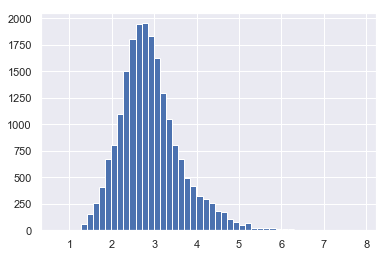

In [22]:
pop_per_hhold_mod['pop_per_hhold'].hist(bins=50)
plt.show()

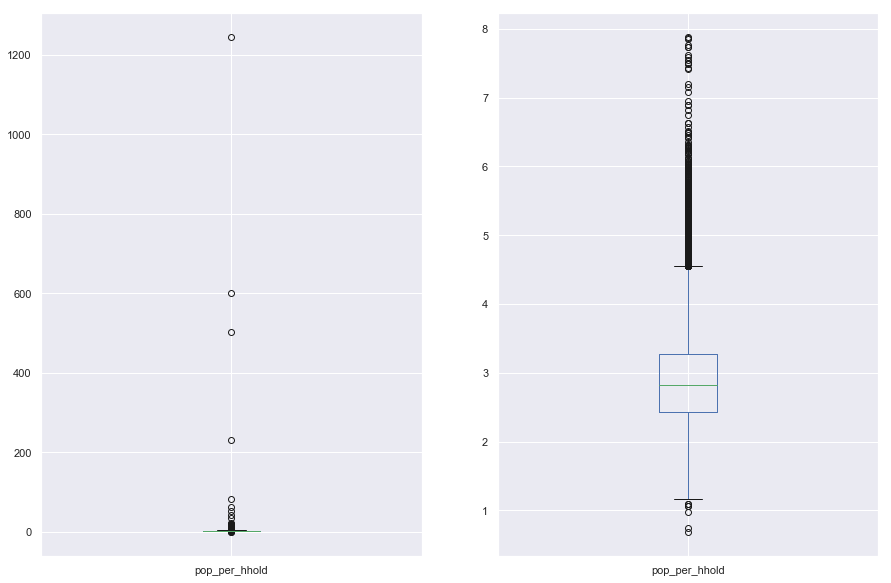

In [23]:
plt.subplot(1, 2, 1)
pop_per_hhold['pop_per_hhold'].plot(kind='box', figsize=(15,10))

plt.subplot(1, 2, 2)
pop_per_hhold_mod['pop_per_hhold'].plot(kind='box')

plt.show()

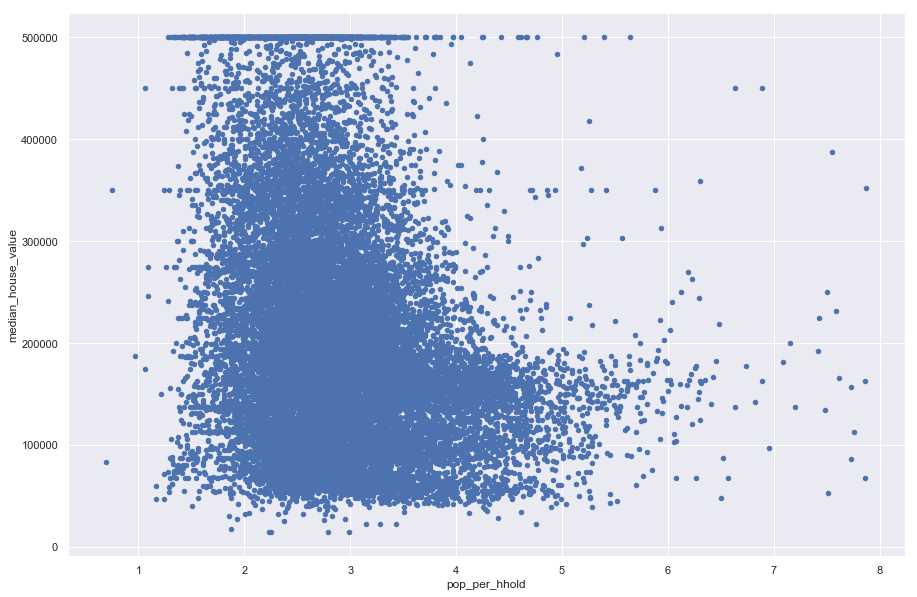

In [24]:
pop_per_hhold_mod.plot(kind='scatter', x='pop_per_hhold', y='median_house_value', figsize=(15, 10))
plt.show()

May have slightly negative effect. When using this, should always set a ceiling value so that there would not be a household with 1200 people.

### 4-2 Income per household

We will use the population per household we just obtained and multiply by the median income, this should roughly give the income per household.

In [25]:
inc_per_hhold = housing[['population', 'households', 'median_income', 'median_house_value']].copy()
inc_per_hhold['inc_per_hhold'] = inc_per_hhold['population']/inc_per_hhold['households']*inc_per_hhold['median_income']
inc_per_hhold.describe()

,population,households,median_income,median_house_value,inc_per_hhold
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1425.476744,499.539680,3.870671,206855.816909,12.255767
std,1132.462122,382.329753,1.899822,115395.615874,93.373507
min,3.000000,1.000000,0.499900,14999.000000,0.402000
25%,787.000000,280.000000,2.563400,119600.000000,7.031545
50%,1166.000000,409.000000,3.534800,179700.000000,9.943446
75%,1725.000000,605.000000,4.743250,264725.000000,14.078262
max,35682.000000,6082.000000,15.000100,500001.000000,12714.824000


In [26]:
sum(inc_per_hhold['inc_per_hhold'] > 50)

30

In [27]:
inc_per_hhold = inc_per_hhold[inc_per_hhold['inc_per_hhold'] <= 50]

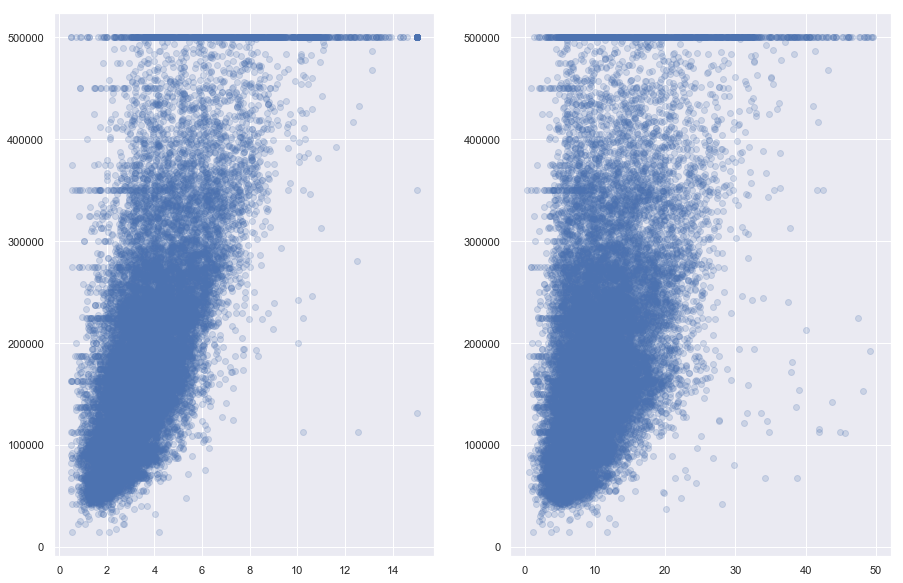

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
axes[0].scatter(data=inc_per_hhold, x='median_income', y='median_house_value', alpha=0.2)
axes[1].scatter(data=inc_per_hhold, x='inc_per_hhold', y='median_house_value', alpha=0.2)
plt.show()

The two graphs are very similar to each other, the axis are different, but is it necessary to include this new attribute?? And what are the pros and cons?

### 5) Population

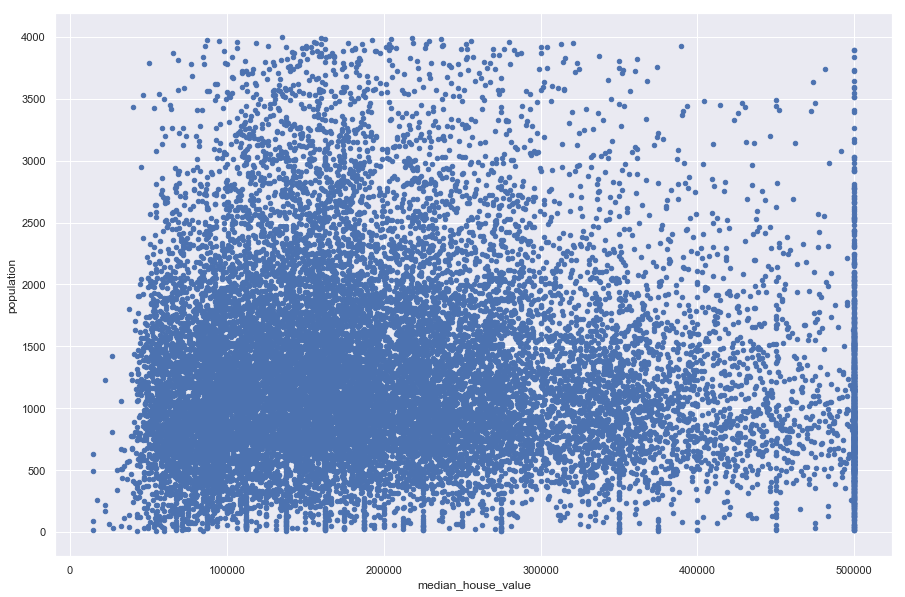

In [29]:
housing[housing['population']<4000].sort_values(by=['median_house_value']).plot(
    kind='scatter', y='population', x='median_house_value', figsize=(15, 10)
)

There are several outliers that effect how we view data. Log transformation vs. remove outlier vs. other methods ???

### 6) Tree classification for feature importance

First need to determine what attributes we want to use.<br>
We will first use all attributes just to see if there is any relationship, plus the created ones.<br>
However, due to lack of data, it may be a good idea to combine ISLAND, NEAR OCEAN and NEAR BAY into one attributes.<br>

*Question: Since we are analyzing data instead of predicting future values, is it still necessary to split into training and testing?? Should we just find the best model that fits the data despite the fact that it may overfit the data??*

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix

op_types = ['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND']

class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attributes].values

class AddAttributesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pop_per_hhold=True, inc_per_hhold=True):
        self.pop_per_hhold = pop_per_hhold
        self.inc_per_hhold = inc_per_hhold
    
    def fit(self, X, y=None):
        self.features = []
        if self.pop_per_hhold:
            self.features.append('pop_per_hhold')
        if self.inc_per_hhold:
            self.features.append('inc_per_hhold')
        return self
    
    def transform(self, X, y=None):
        """Precondition: the columns of X are: population, households, median_income."""
        pop_per_hhold = X[:, 0] / X[:, 1]
        inc_per_hhold = X[:, 0] / X[:, 1] * X[:, 2]
        if self.pop_per_hhold and self.inc_per_hhold:
            return np.c_[pop_per_hhold, inc_per_hhold]
        elif self.pop_per_hhold:
            return pop_per_hhold
        elif self.inc_per_hhold:
            return inc_per_hhold
        raise AttributeError
    
    def get_feature_names(self):
        return self.features

class OceanProximityTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, combine=True):
        self.combine = combine
    
    def fit(self, X, y=None):
        if self.combine:
            self.combined_attributes = op_types[2:]
            self.combined_name = 'OTHER'
            self.types = {op_types[0]: 0, op_types[1]: 1, op_types[2]: 2, op_types[3]: 2, op_types[4]: 2}
            self.ncols = 3
        else:
            self.combined_attributes = []
            self.combined_name = None
            self.types = {}
            for i, name in enumerate(op_types):
                self.types[name] = i
            self.ncols = 5
        return self
    
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for r, loc in enumerate(X[:, 0]):
            rows.append(r)
            cols.append(self.types.get(loc, 0))
            data.append(1)
        return csr_matrix((data, (rows, cols)), shape=(X.shape[0], self.ncols))

In [31]:
X = housing.drop(['median_house_value'], axis=1)
y = housing['median_house_value'].copy()

num_attribs = list(X.columns)
num_attribs.remove('ocean_proximity')
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [32]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

ocean_proximity_pipeline = Pipeline([
    ('attrib_selector', AttributeSelector(['ocean_proximity'])),
    ('op_transformer', OceanProximityTransformer()),
])

add_attrib_pipeline = Pipeline([
    ('attrib_selector', AttributeSelector(['population', 'households', 'median_income'])),
    ('attrib_adder', AddAttributesTransformer()),
    ('std_scaler', StandardScaler()),
])

num_attrib_pipeline = Pipeline([
    ('attrib_selector', AttributeSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

full_pipeline = FeatureUnion([
    ('op_pipeline', ocean_proximity_pipeline),
    ('aa_pipeline', add_attrib_pipeline),
    ('num_pipeline', num_attrib_pipeline),
])

In [33]:
X_transformed = full_pipeline.fit_transform(X)
X_transformed.toarray()[:5]

array([[ 0.        ,  0.        ,  1.        , -0.04959654,  0.09660088,
        -1.32783522,  1.05254828,  0.98214266, -0.8048191 , -0.97247648,
        -0.9744286 , -0.97703285,  2.34476576],
       [ 0.        ,  0.        ,  1.        , -0.09251223,  0.0563222 ,
        -1.32284391,  1.04318455, -0.60701891,  2.0458901 ,  1.35714343,
         0.86143887,  1.66996103,  2.33223796],
       [ 0.        ,  0.        ,  1.        , -0.02584253,  0.08655078,
        -1.33282653,  1.03850269,  1.85618152, -0.53574589, -0.82702426,
        -0.82077735, -0.84363692,  1.7826994 ],
       [ 0.        ,  0.        ,  1.        , -0.0503293 ,  0.0227323 ,
        -1.33781784,  1.03850269,  1.85618152, -0.62421459, -0.71972345,
        -0.76602806, -0.73378144,  0.93296751],
       [ 0.        ,  0.        ,  1.        , -0.08561576, -0.04139827,
        -1.33781784,  1.03850269,  1.85618152, -0.46240395, -0.61242263,
        -0.75984669, -0.62915718, -0.012881  ]])

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_transformed, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
try:
    tree_reg.feature_importances_
except:
    from sklearn.externals import joblib
    tree_reg = joblib.load('tree_reg')

In [47]:
from sklearn.metrics import mean_squared_error

prediction = tree_reg.predict(X_transformed)
print("Prediction: ", prediction)
print("True value: ", np.array(y))
print("RMSE score: ", np.sqrt(mean_squared_error(prediction, y)))

Prediction:  [452600. 358500. 352100. ...  92300.  84700.  89400.]
True value:  [452600. 358500. 352100. ...  92300.  84700.  89400.]
RMSE score:  0.0


All right... So decision tree is definitely overfitting the data set... But is that what we want since we are only analyzing what we have instead of trying to predict the future??<br>

We will save the model for now.

In [44]:
# from sklearn.externals import joblib
# joblib.dump(tree_reg, 'tree_reg')

['tree_reg']

Generate the feature importance.

In [38]:
features = ['<1H OCEAN', 'INLAND', 'OTHER OCEAN PROXIMITY'] + ['pop_per_hhold', 'inc_per_hhold'] + num_attribs
feature_importance = tree_reg.feature_importances_
sorted(zip(feature_importance, features), reverse=True)

[(0.4764836588048001, 'median_income'),
 (0.13891854238360676, 'INLAND'),
 (0.12236661940158279, 'pop_per_hhold'),
 (0.0708604301705726, 'latitude'),
 (0.0684048881620233, 'longitude'),
 (0.0434507773597231, 'housing_median_age'),
 (0.017969749245451038, 'total_rooms'),
 (0.017954934973147565, 'inc_per_hhold'),
 (0.014979309858226705, 'households'),
 (0.013522727982851491, 'population'),
 (0.012556334789591105, 'total_bedrooms'),
 (0.0013879166287162363, 'OTHER OCEAN PROXIMITY'),
 (0.0011441102397071936, '<1H OCEAN')]

Looks like the most important feature here is indeed median_income, with INLAND and pop_per_hhold being more than 10%.

###  7) Polynomial features

Next we will try polynomial features.<br>

Note that *pop_per_hhold = population/households*, so when generating polynomial features, *pop_per_hhold x households = population* is redundant, so we need to take care of that. Same for inc_per_hhold.<br>
Alright I'm being lazy here, for now we will not include any combination between (pop_perhhold, inc_per_hhold) and other attributes.

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly_num_pipeline = Pipeline([
    ('attrib_selector', AttributeSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('poly_features', PolynomialFeatures(2)),
    ('std_scaler', StandardScaler()),
])

full_poly_pipeline = FeatureUnion([
    ('poly_num_pipeline', poly_num_pipeline),
    ('aa_pipeline', add_attrib_pipeline),
])

In [40]:
poly_X_transformed = full_poly_pipeline.fit_transform(housing)
poly_X_transformed.shape

(20640, 47)

We have 47 features now, so it will take a while to train... We will first use Linear Regression.

*Question: Same as before, is it still necessary to use Lasso or Ridge to prevent overfitting?*

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(poly_X_transformed, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
prediction = lin_reg.predict(poly_X_transformed)
np.sqrt(mean_squared_error(prediction, y))

63281.37829155239

Linear regression seems to be underfitting the data, we will switch back to decision tree.

In [43]:
# poly_tree_reg = DecisionTreeClassifier()
# poly_tree_reg.fit(poly_X_transformed, y)